In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
file_path = "/content/processed.cleveland[1].data"

# Load the data
df = pd.read_csv(file_path, header=None, na_values='?')


df.columns = [
    'age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang',
    'oldpeak','slope','ca','thal','target'
]

print("Shape of data:", df.shape)
df.head()

Shape of data: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
# Basic info about the dataset
print("=== Data Info ===")
print(df.info())

print("\n=== Missing values per column ===")
print(df.isna().sum())

print("\n=== Original target distribution (0–4 classes) ===")
print(df['target'].value_counts())


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

=== Missing values per column ===
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca     

In [4]:
# Imputing missing values in 'ca' and 'thal' using the median
df['ca'].fillna(df['ca'].median(), inplace=True)
df['thal'].fillna(df['thal'].median(), inplace=True)

print("=== Missing values after imputation ===")
print(df.isna().sum())


=== Missing values after imputation ===
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


/tmp/ipython-input-2481484780.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ca'].fillna(df['ca'].median(), inplace=True)
/tmp/ipython-input-2481484780.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

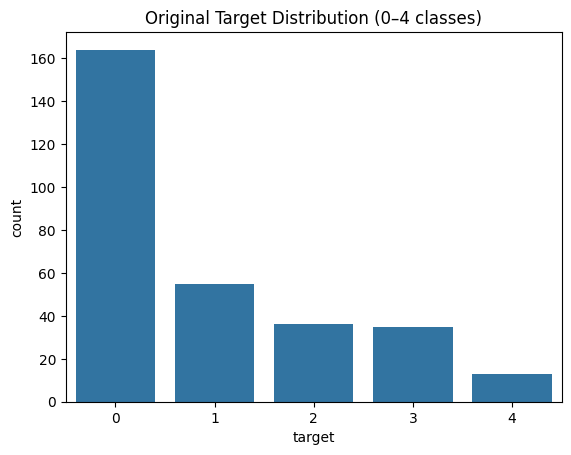

In [5]:
sns.countplot(x='target', data=df)
plt.title("Original Target Distribution (0–4 classes)")
plt.show()

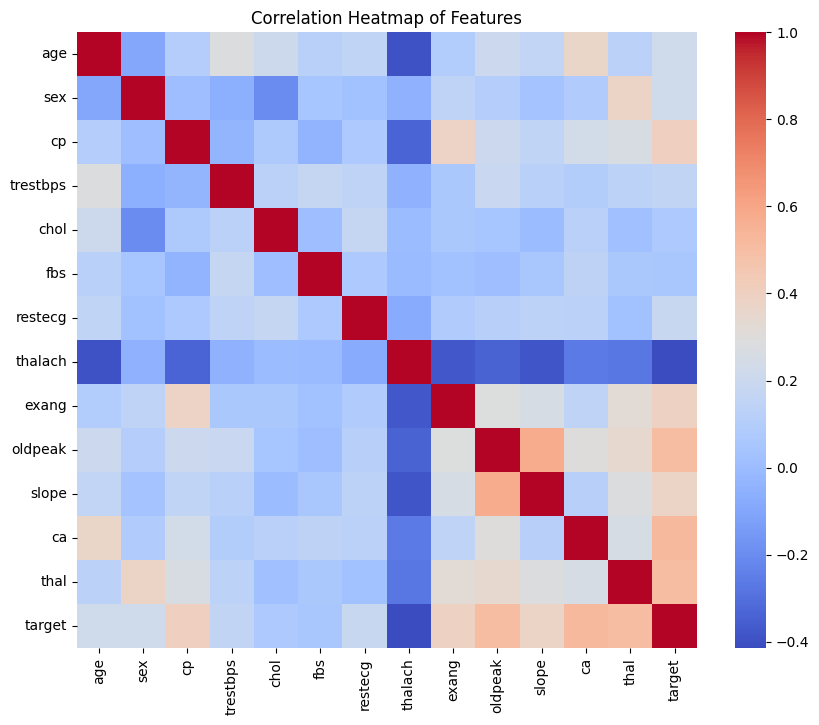

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()

Binary target distribution (0 = no disease, 1 = disease):
target_bin
0    164
1    139
Name: count, dtype: int64


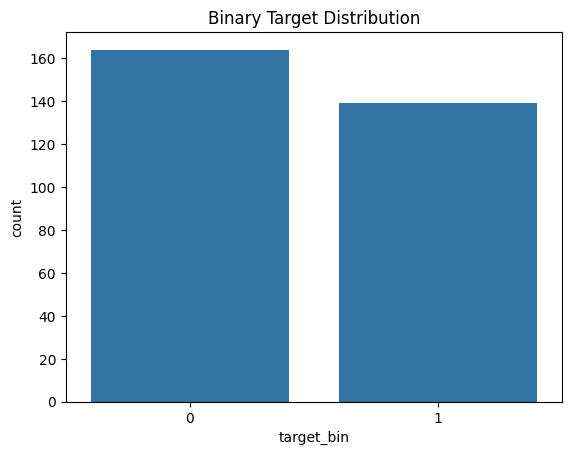

In [7]:
# Convert multi-class target (0–4) to binary:
df['target_bin'] = (df['target'] > 0).astype(int)

print("Binary target distribution (0 = no disease, 1 = disease):")
print(df['target_bin'].value_counts())

sns.countplot(x='target_bin', data=df)
plt.title("Binary Target Distribution")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Features and binary target
X = df.drop(['target', 'target_bin'], axis=1)
y = df['target_bin']

# Train–test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("\nTrain class balance:\n", y_train.value_counts())
print("\nTest class balance:\n", y_test.value_counts())


Train shape: (212, 13)
Test shape: (91, 13)

Train class balance:
 target_bin
0    115
1     97
Name: count, dtype: int64

Test class balance:
 target_bin
0    49
1    42
Name: count, dtype: int64


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [10]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # For ROC-AUC
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    # Metrics
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_scores)

    print(f"\n=== {name} Performance on Test Set ===")
    print(f"Accuracy : {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall   : {rec:.3f}")
    print(f"F1-score : {f1:.3f}")
    print(f"ROC-AUC  : {auc:.3f}")
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{name} - ROC Curve")
    plt.legend()
    plt.show()


=== Logistic Regression Performance on Test Set ===
Accuracy : 0.835
Precision: 0.829
Recall   : 0.810
F1-score : 0.819
ROC-AUC  : 0.915


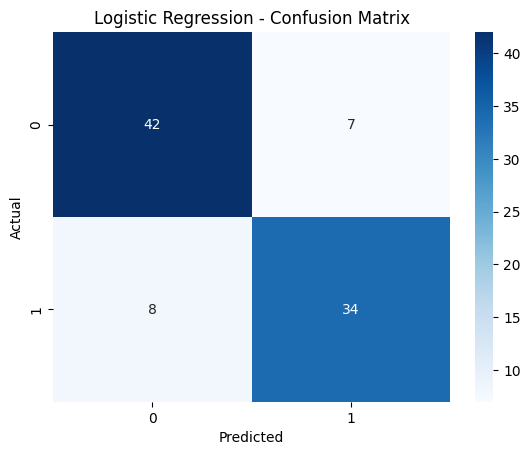

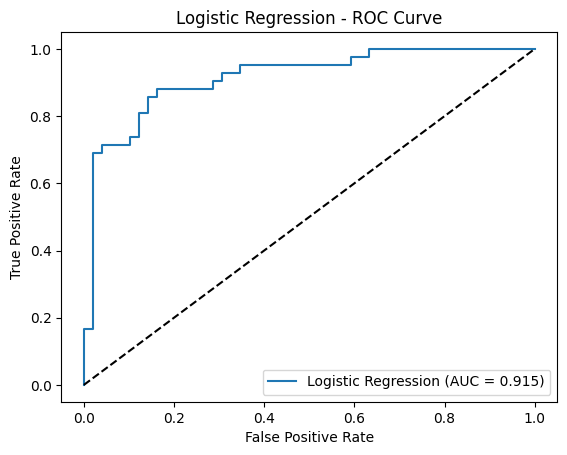

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')

evaluate_model(
    name="Logistic Regression",
    model=log_reg,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test
)



=== SVM (RBF) Performance on Test Set ===
Accuracy : 0.824
Precision: 0.810
Recall   : 0.810
F1-score : 0.810
ROC-AUC  : 0.908


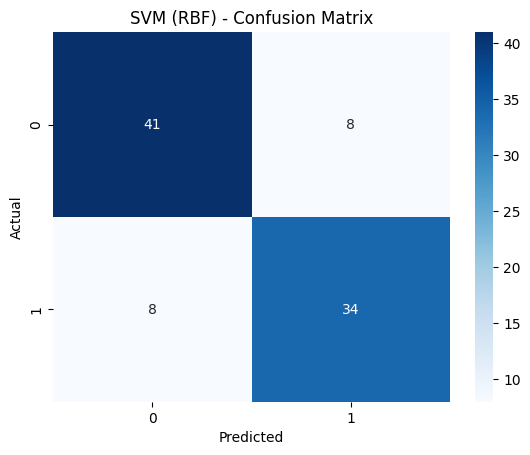

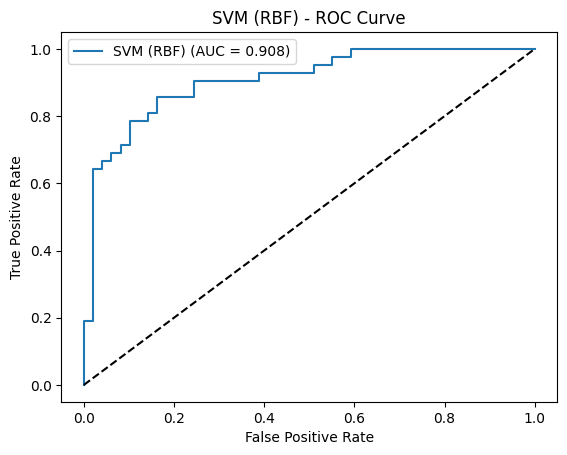

In [12]:
from sklearn.svm import SVC

svm_rbf = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42
)

evaluate_model(
    name="SVM (RBF)",
    model=svm_rbf,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test
)



=== Random Forest Performance on Test Set ===
Accuracy : 0.857
Precision: 0.837
Recall   : 0.857
F1-score : 0.847
ROC-AUC  : 0.925


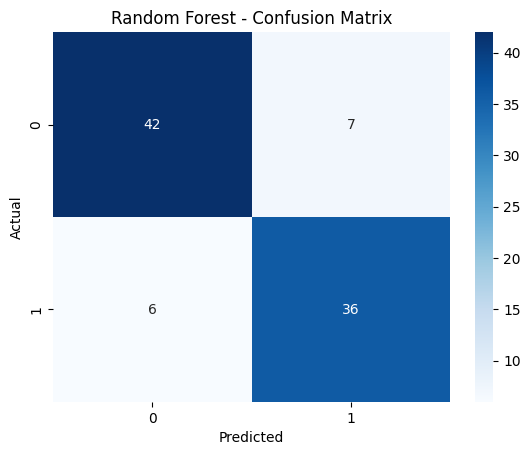

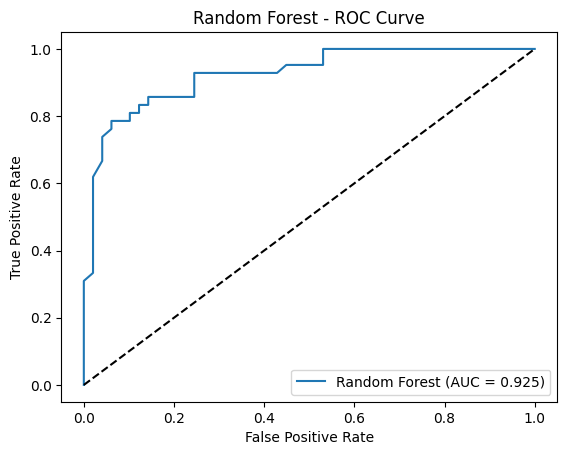

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

evaluate_model(
    name="Random Forest",
    model=rf_clf,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test
)

In [14]:
metrics_list = []

def get_metrics_row(name, model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)

    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_te)[:, 1]
    else:
        y_scores = model.decision_function(X_te)

    return {
        "Model": name,
        "Accuracy":  accuracy_score(y_te, y_pred),
        "Precision": precision_score(y_te, y_pred),
        "Recall":    recall_score(y_te, y_pred),
        "F1-score":  f1_score(y_te, y_pred),
        "ROC-AUC":   roc_auc_score(y_te, y_scores)
    }

metrics_list.append(get_metrics_row("Logistic Regression", LogisticRegression(max_iter=1000, solver='liblinear'),
                                    X_train_scaled, X_test_scaled, y_train, y_test))
metrics_list.append(get_metrics_row("SVM (RBF)", SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42),
                                    X_train_scaled, X_test_scaled, y_train, y_test))
metrics_list.append(get_metrics_row("Random Forest", RandomForestClassifier(n_estimators=200, random_state=42),
                                    X_train, X_test, y_train, y_test))

metrics_df = pd.DataFrame(metrics_list)
metrics_df

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Logistic Regression,0.835165,0.829268,0.809524,0.819277,0.914966
1,SVM (RBF),0.824176,0.809524,0.809524,0.809524,0.907677
2,Random Forest,0.857143,0.837209,0.857143,0.847059,0.924927


<Figure size 1000x600 with 0 Axes>

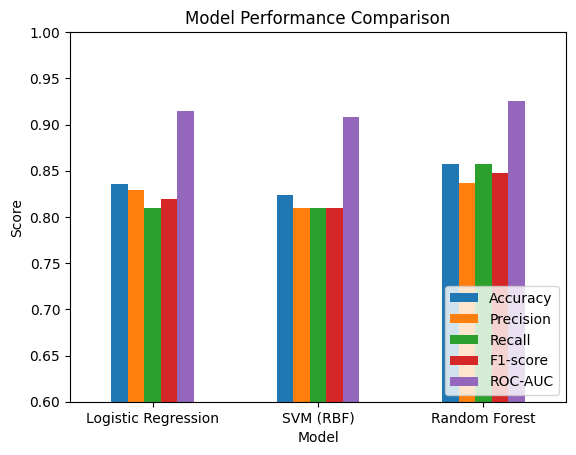

In [15]:
plt.figure(figsize=(10,6))
metrics_df.set_index("Model")[["Accuracy","Precision","Recall","F1-score","ROC-AUC"]].plot(kind="bar")
plt.ylim(0.6, 1.0)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()

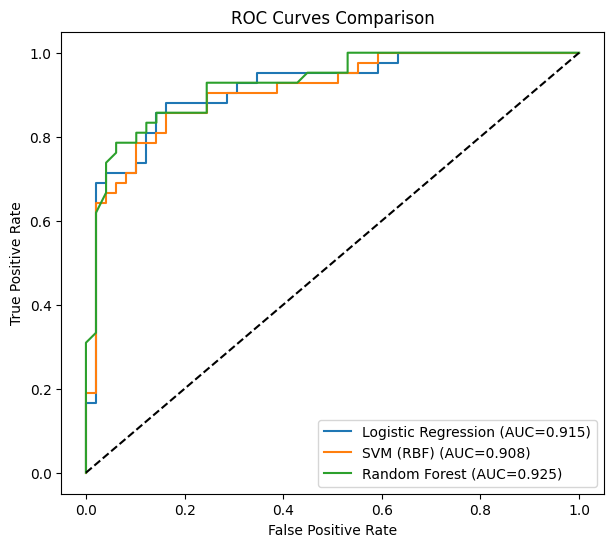

In [16]:
plt.figure(figsize=(7,6))

for name, model, X_tr, X_te in [
    ("Logistic Regression", LogisticRegression(max_iter=1000, solver='liblinear'), X_train_scaled, X_test_scaled),
    ("SVM (RBF)", SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42), X_train_scaled, X_test_scaled),
    ("Random Forest", RandomForestClassifier(n_estimators=200, random_state=42), X_train, X_test),
]:
    model.fit(X_tr, y_train)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_te)[:,1]
    else:
        y_scores = model.decision_function(X_te)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()
